In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import isnan
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
df = pd.read_csv('/content/drive/MyDrive/mu_sigma/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
def percent_missing(df):
    percent_nan = (df.isnull().sum()/len(df))*100
    percent_nan = percent_nan[percent_nan>0].sort_values() # percentage missing is more than 0%
    return percent_nan

In [4]:
## accessing the function
percent_nan = percent_missing(df)
percent_nan

Series([], dtype: float64)

In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


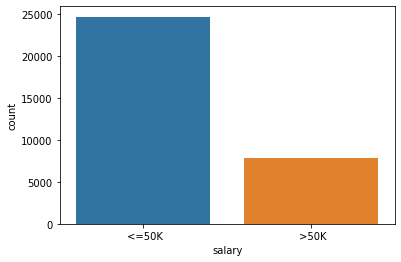

In [7]:
sns.countplot(x = 'salary',data = df)

In [8]:
df['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [9]:
print(f"<= 50k : {round(24720 /32561 * 100 , 2)}")
print(f"> 50k : {round(7841 /32561 * 100 , 2)}")

<= 50k : 75.92
> 50k : 24.08


In [10]:
num_columns = df.select_dtypes(include='int64')
num_columns

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0dff2e0210>,
      dtype=object)

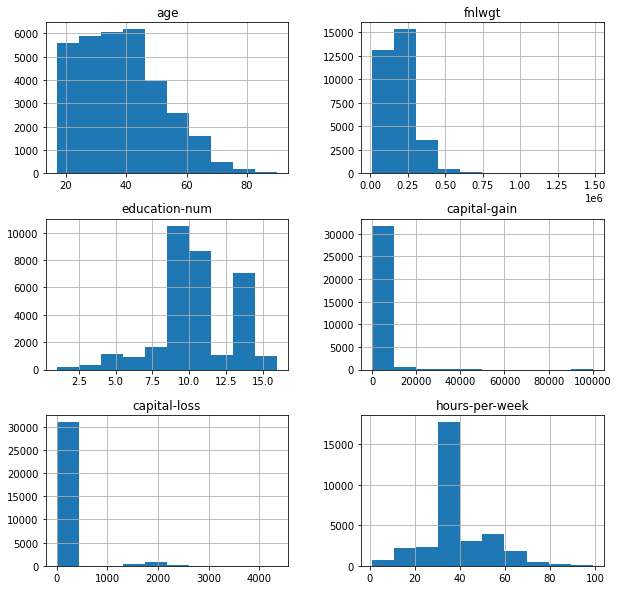

In [13]:
num_columns.hist(figsize=(10,10))

In [18]:
num_lst = num_columns.columns
num_lst

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [20]:
for i in num_lst:
    print(f" {i}  :  {len(df[i].unique())}")

 age  :  73
 fnlwgt  :  21648
 education-num  :  16
 capital-gain  :  119
 capital-loss  :  92
 hours-per-week  :  94


In [23]:
## It holds discrete data
df["education-num"].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8])

In [26]:
## we will apply log transformation on age and fnlwgt but not oncapital loss, capital gain as log(0) will give n.d
df["age"] = np.log(df["age"])
df["fnlwgt"] = np.log(df["fnlwgt"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0dfd0961d0>,
      dtype=object)

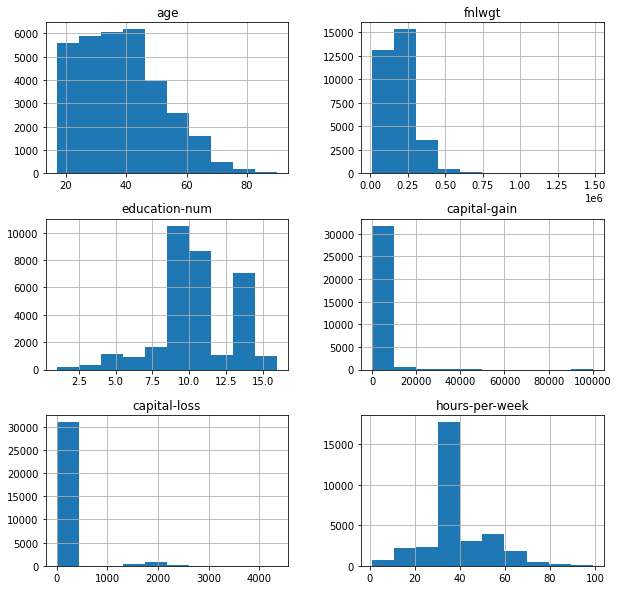

In [27]:
num_columns.hist(figsize=(10,10))

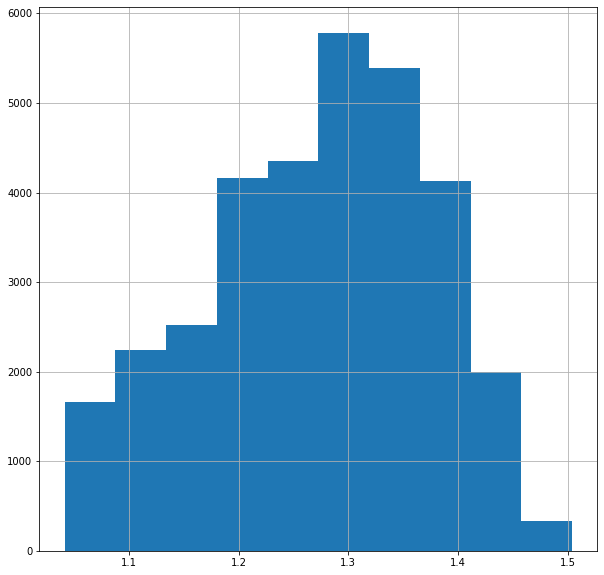

In [29]:
df['age'].hist(figsize=(10,10))

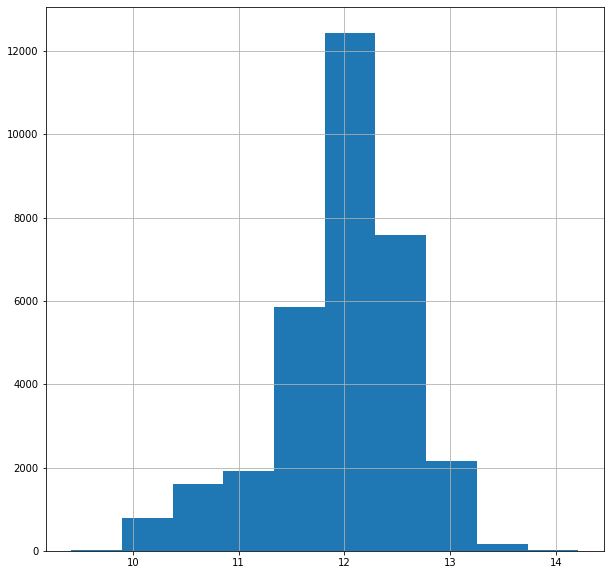

In [30]:
df['fnlwgt'].hist(figsize=(10,10))

In [31]:
## Handling Categorical Data

In [34]:
cat_columns = df.select_dtypes(include='object')
cat_columns.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'country', 'salary'],
      dtype='object')

In [35]:
for feature in cat_columns.columns:
    print(f" {feature}  :  {len(df[feature].unique())}")

 workclass  :  9
 education  :  16
 marital-status  :  7
 occupation  :  15
 relationship  :  6
 race  :  5
 sex  :  2
 country  :  42
 salary  :  2


In [36]:
for feature in  cat_columns.columns:
    print(df[feature].value_counts()) 
    print("\n \n ")

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

 
 
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

 
 
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

 
 
 Prof-specialty       4140
 Craft-repair         4099
 

In [ ]:
## Handling missing values in categorical features

In [37]:
## in this colums there is ? in all so i tried to fill with mode as they are less in frequency or else it would have been biased if it was higher %
print(f"workclass : {round(2093 / 32561 , 4) *100}%")
print(f"occupation : {round(1843 / 32561 , 4) *100}%")
print(f"native-country : {round(583 / 32561 , 4) *100}%")

workclass : 6.43%
occupation : 5.66%
native-country : 1.79%


In [39]:
## as we have less than 6 percent missing values so we can fill it with mode value
df["occupation"].mode()[0]

' Prof-specialty'

In [44]:
## filling with modes
df["workclass"] = df['workclass'].str.replace('?', 'Private' )
df['occupation'] = df['occupation'].str.replace('?', 'Prof-specialty' )
df['country'] = df['country'].str.replace('?', 'United-States' )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [45]:
for feature in  cat_columns.columns:
    print(df[feature].value_counts()) 
    print("\n \n ")

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

 
 
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

 
 
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

 
 
 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 

In [47]:
# education Category
## you treat same for preschool, 1-4th and all as school becoz that is not gonna affect salary
## replaced with higher the next section
df["education"].replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school' ,
                         inplace = True , regex = True)
df["education"].replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher' , inplace = True , regex = True)

In [49]:
#martial status
df['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married' , inplace = True , regex = True)
df['marital-status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other' , inplace = True , regex = True)

In [51]:
# income
df["salary"] = df["salary"].replace({'<=50K' : 0 , ">50K" : 1 } , regex = True)

In [52]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,1.298436,State-gov,11.258240,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,1.364055,Self-emp-not-inc,11.330336,Bachelors,13,married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,1.291320,Private,12.281393,HS-grad,9,other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,1.378840,Private,12.366153,school,7,married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,1.203634,Private,12.732011,Bachelors,13,married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [53]:
## checking as uniique count has reduced
for feature in cat_columns.columns:
    print(f" {feature}  :  {len(df[feature].unique())}")

 workclass  :  8
 education  :  6
 marital-status  :  3
 occupation  :  14
 relationship  :  6
 race  :  5
 sex  :  2
 country  :  41
 salary  :  2


In [55]:
df["education"].unique()

array([' Bachelors', ' HS-grad', ' school', ' Masters', ' higher',
       ' Doctorate'], dtype=object)

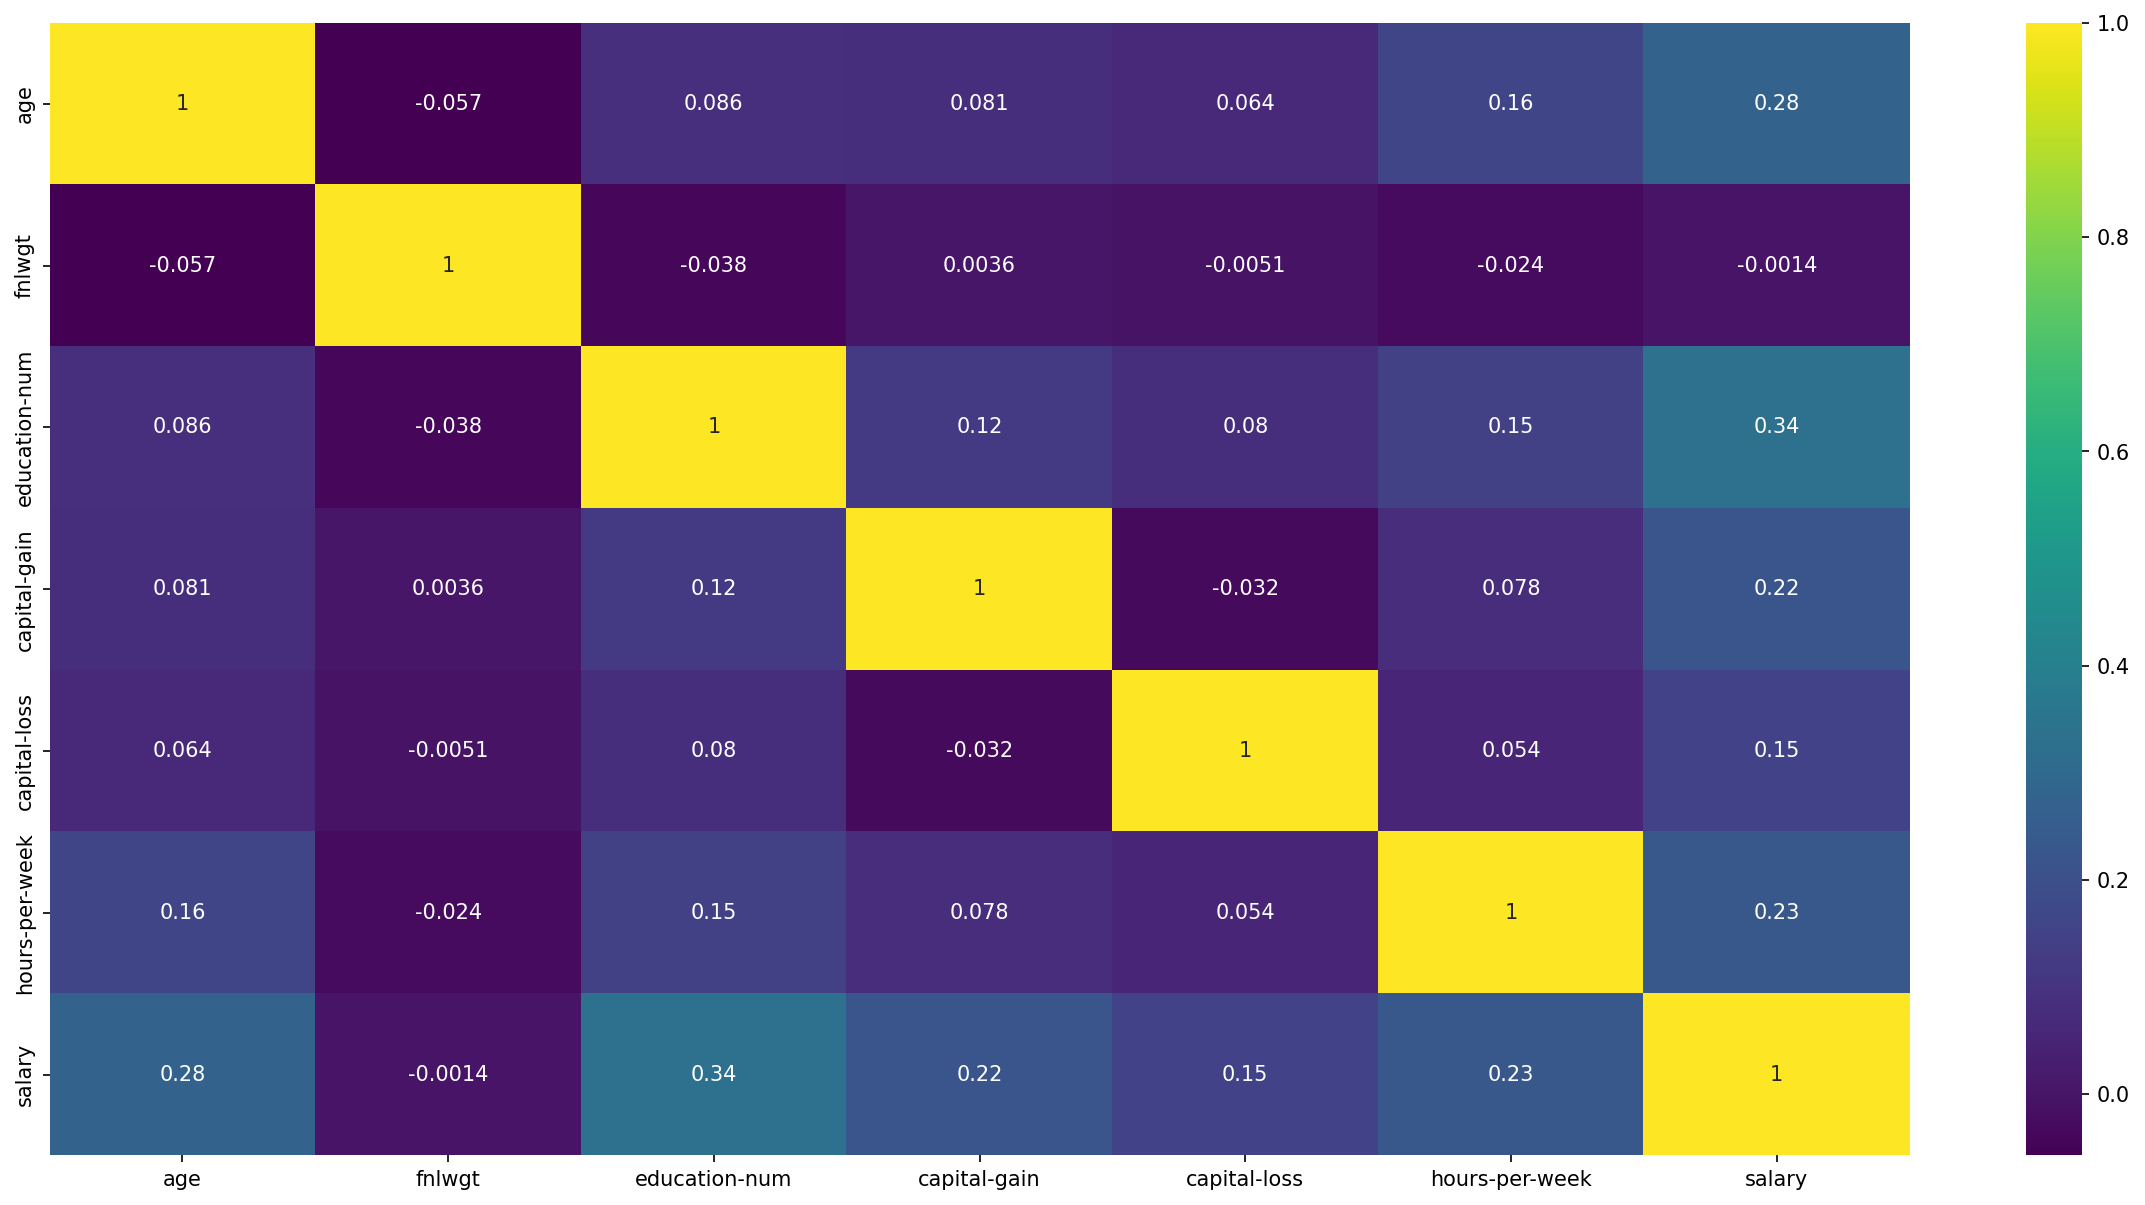

In [56]:
plt.figure(figsize=(20,10), dpi = 150)
sns.heatmap(df.corr(), annot = True, cmap = 'viridis')

In [57]:
df.corr()['salary'][: -1].sort_values()

fnlwgt           -0.001373
capital-loss      0.150526
capital-gain      0.223329
hours-per-week    0.229689
age               0.275813
education-num     0.335154
Name: salary, dtype: float64

In [58]:
from sklearn.preprocessing import  LabelEncoder
df = df.apply(LabelEncoder().fit_transform)
df .head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,22,6,2671,0,12,0,0,1,4,1,25,0,39,38,0
1,33,5,2926,0,12,1,3,0,4,1,0,0,12,38,0
2,21,3,14086,2,8,2,5,1,4,1,0,0,39,38,0
3,36,3,15336,5,6,1,5,0,2,1,0,0,39,38,0
4,11,3,19355,0,12,1,9,5,2,0,0,0,39,4,0


In [59]:
## splitting the data
X = df.drop(['salary'], axis =1)
y = df['salary']

In [62]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,22,6,2671,0,12,0,0,1,4,1,25,0,39,38
1,33,5,2926,0,12,1,3,0,4,1,0,0,12,38
2,21,3,14086,2,8,2,5,1,4,1,0,0,39,38
3,36,3,15336,5,6,1,5,0,2,1,0,0,39,38
4,11,3,19355,0,12,1,9,5,2,0,0,0,39,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,10,3,16528,4,11,1,12,5,4,0,0,0,37,38
32557,23,3,8080,2,8,1,6,0,4,1,0,0,39,38
32558,41,3,7883,2,8,2,0,4,4,0,0,0,39,38
32559,5,3,12881,2,8,0,0,3,4,1,0,0,19,38


In [63]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 32561, dtype: int64

In [60]:
## handling imbalanced dataset
%%time
SMOTEENN = SMOTEENN(n_jobs=-1)
print('Original dataset shape %s' % Counter(y))
X_res, y_res = SMOTEENN.fit_resample(X, y)
print('After undersample dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 24720, 1: 7841})
After undersample dataset shape Counter({1: 18315, 0: 12834})
CPU times: user 1.73 s, sys: 13.1 ms, total: 1.74 s
Wall time: 1.6 s


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


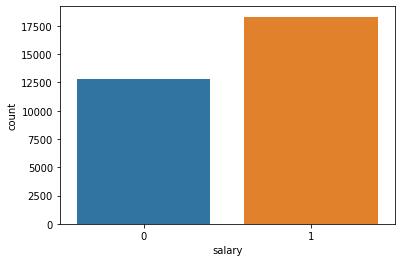

In [61]:
labeldf = pd.DataFrame(y_res,columns=['salary'])
sns.countplot(labeldf['salary'])

In [64]:
##splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size = 0.3, random_state = 101)

In [65]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [66]:
X_train

array([[ 1.70106572,  2.86935367, -0.45294124, ..., -0.2390151 ,
        -0.29272127,  0.24732944],
       [-0.25802824,  0.03346943, -0.5249709 , ...,  4.15537698,
        -0.11818596, -2.69782334],
       [-0.02293696,  0.03346943, -0.84310192, ..., -0.2390151 ,
         0.49268763,  0.24732944],
       ...,
       [ 0.21215431,  0.03346943, -1.73980453, ..., -0.2390151 ,
        -0.11818596,  0.24732944],
       [ 0.6039731 ,  0.03346943, -0.39958593, ..., -0.2390151 ,
         0.31815232,  0.24732944],
       [ 0.21215431, -1.85712006,  1.7501327 , ..., -0.2390151 ,
         0.31815232,  0.24732944]])

In [67]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Model 1 : LGBM

In [69]:
%%time
import lightgbm as lgb
clf = lgb.LGBMClassifier(boosting_type='goss',objective='binary',n_jobs=-1,n_estimators=200)
clf.fit(X_train, y_train)

CPU times: user 2.4 s, sys: 23.5 ms, total: 2.42 s
Wall time: 2.26 s


In [70]:
y_pred=clf.predict(X_test)

In [71]:
print("The ROC-AUC Score obtained on CV set is : " , roc_auc_score(y_test, y_pred))
print("The Macro F1-Score obtained on CV set is : " , f1_score(y_test,  y_pred,average = 'macro'))
print("The F1 scores of each class on CV set are : ",f1_score(y_test,  y_pred,average = None))

The ROC-AUC Score obtained on CV set is :  0.9419765365258098
The Macro F1-Score obtained on CV set is :  0.9431846086983369
The F1 scores of each class on CV set are :  [0.93245383 0.95391539]


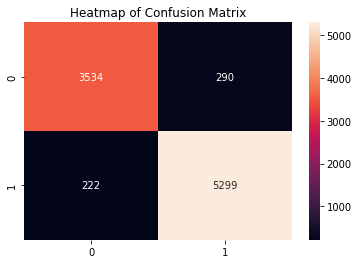

In [72]:
cm = confusion_matrix(y_test, y_pred )
plt.title('Heatmap of Confusion Matrix', fontsize = 12)
sns.heatmap(cm, annot = True ,  fmt = "d")
plt.show()

In [74]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3824
           1       0.95      0.96      0.95      5521

    accuracy                           0.95      9345
   macro avg       0.94      0.94      0.94      9345
weighted avg       0.95      0.95      0.95      9345



In [ ]:
## precision is 0.95 for Light GbM

Model 2 : RandomForest

In [79]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler
def objective(trial):
    # Define the search space
    criterions = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depths = trial.suggest_int('max_depth', 1, 9, 1)
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, 100)

    rf_clf = RandomForestClassifier(n_estimators=n_estimators,
                                 criterion=criterions,
                                 max_depth=max_depths,
                                 n_jobs=-1)
    score = cross_val_score(rf_clf, X_train, y_train, scoring="roc_auc").mean()

    return score

In [78]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 308 kB 7.2 MB/s 
     |████████████████████████████████| 81 kB 8.1 MB/s 
     |████████████████████████████████| 209 kB 42.2 MB/s 
     |████████████████████████████████| 78 kB 6.2 MB/s 
     |████████████████████████████████| 112 kB 40.0 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
     |████████████████████████████████| 146 kB 43.8 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=e531161abd4f30c74b01ab39204dfa53b42458ca8b25fd583b7ff6e512da473c
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [80]:
%%time
study = optuna.create_study(study_name="randomForest_optimization",sampler=TPESampler(),direction='maximize')
study.optimize(objective, n_trials=15, show_progress_bar=True)

[I 2022-06-25 11:45:04,894] A new study created in memory with name: randomForest_optimization
/usr/local/lib/python3.7/dist-packages/optuna/progress_bar.py:47: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/15 [00:00<?, ?it/s]

[I 2022-06-25 11:45:16,946] Trial 0 finished with value: 0.9767254547450094 and parameters: {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 200}. Best is trial 0 with value: 0.9767254547450094.
[I 2022-06-25 11:45:33,070] Trial 1 finished with value: 0.9462673389644543 and parameters: {'criterion': 'entropy', 'max_depth': 2, 'n_estimators': 500}. Best is trial 0 with value: 0.9767254547450094.
[I 2022-06-25 11:45:51,760] Trial 2 finished with value: 0.9634610071052968 and parameters: {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 500}. Best is trial 0 with value: 0.9767254547450094.
[I 2022-06-25 11:45:57,289] Trial 3 finished with value: 0.971118706237805 and parameters: {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100}. Best is trial 0 with value: 0.9767254547450094.
[I 2022-06-25 11:46:09,484] Trial 4 finished with value: 0.9744797274146428 and parameters: {'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 200}. Best is trial 0 with value: 0.9767254547

In [81]:
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))

Accuracy: 0.9789002856849279


In [82]:
print(study.best_params)

{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 700}


In [83]:
%%time
rf_model =  RandomForestClassifier(**study.best_params)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test,y_pred ))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      3824
           1       0.92      0.96      0.94      5521

    accuracy                           0.93      9345
   macro avg       0.93      0.92      0.93      9345
weighted avg       0.93      0.93      0.93      9345

CPU times: user 14.6 s, sys: 9.22 ms, total: 14.6 s
Wall time: 15 s


In [86]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 71 kB/s 


In [88]:
from catboost import CatBoostClassifier, Pool
pool_train = Pool(X_train, y_train)

pool_test = Pool(X_test)

In [89]:
import time

start = time.time()

cbc = CatBoostClassifier(iterations=100,max_depth=2)

cbc.fit(pool_train)
y_pred = cbc.predict(X_test)


print(classification_report(y_test,y_pred ))

end = time.time()
diff = end - start
print('Execution time:', diff)

Learning rate set to 0.317314
0:	learn: 0.5607550	total: 54.8ms	remaining: 5.43s
1:	learn: 0.4821365	total: 66.8ms	remaining: 3.27s
2:	learn: 0.4284825	total: 70.1ms	remaining: 2.27s
3:	learn: 0.3920526	total: 74.3ms	remaining: 1.78s
4:	learn: 0.3633630	total: 89.4ms	remaining: 1.7s
5:	learn: 0.3390526	total: 95.3ms	remaining: 1.49s
6:	learn: 0.3208980	total: 100ms	remaining: 1.33s
7:	learn: 0.3074792	total: 107ms	remaining: 1.23s
8:	learn: 0.2938162	total: 116ms	remaining: 1.17s
9:	learn: 0.2843013	total: 124ms	remaining: 1.11s
10:	learn: 0.2766386	total: 135ms	remaining: 1.09s
11:	learn: 0.2694407	total: 140ms	remaining: 1.02s
12:	learn: 0.2610705	total: 147ms	remaining: 986ms
13:	learn: 0.2533980	total: 157ms	remaining: 966ms
14:	learn: 0.2465165	total: 160ms	remaining: 906ms
15:	learn: 0.2428363	total: 165ms	remaining: 868ms
16:	learn: 0.2383345	total: 173ms	remaining: 844ms
17:	learn: 0.2350705	total: 182ms	remaining: 830ms
18:	learn: 0.2311977	total: 189ms	remaining: 807ms
19:	le

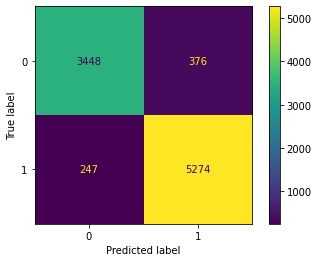

In [91]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot() ## This give figure
plt.show()

Top Scoring Model : Light GBM Worked Well 